In [2]:
import torch
from torch import nn

torch.__version__

'2.5.1+cu121'

In [3]:
device = "cuda" if torch.cuda.is_available() else "gpu"
device

'cuda'

In [2]:
import requests
import zipfile
from pathlib import Path

data_path = Path("../data")
image_path = data_path / "pizza_steak_sushi"

if image_path.is_dir():
    print(f"{image_path} directory already exists... skipping download")
else:
    print(f"{image_path} does not exist, downloading ...")
    image_path.mkdir(parents=True, exist_ok=True)

    # fetch and download data
    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        print("Downloading data")
        f.write(request.content)

    # unzip data
    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
        print('Unzipping data...')
        zip_ref.extractall(image_path)

..\data\pizza_steak_sushi does not exist, downloading ...
Unzipping data...


In [3]:
import os

def walk_through_dir(dir_path):
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

In [4]:
walk_through_dir(image_path)

There are 2 directories and 0 images in '..\data\pizza_steak_sushi'
There are 3 directories and 0 images in '..\data\pizza_steak_sushi\test'
There are 0 directories and 25 images in '..\data\pizza_steak_sushi\test\pizza'
There are 0 directories and 19 images in '..\data\pizza_steak_sushi\test\steak'
There are 0 directories and 31 images in '..\data\pizza_steak_sushi\test\sushi'
There are 3 directories and 0 images in '..\data\pizza_steak_sushi\train'
There are 0 directories and 78 images in '..\data\pizza_steak_sushi\train\pizza'
There are 0 directories and 75 images in '..\data\pizza_steak_sushi\train\steak'
There are 0 directories and 72 images in '..\data\pizza_steak_sushi\train\sushi'


In [7]:
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(WindowsPath('../data/pizza_steak_sushi/train'),
 WindowsPath('../data/pizza_steak_sushi/test'))

In [13]:
image_path

WindowsPath('../data/pizza_steak_sushi')

random_image_path : ..\data\pizza_steak_sushi\test\sushi\2394442.jpg
Image class : sushi
Image height: 408
Image width : 512


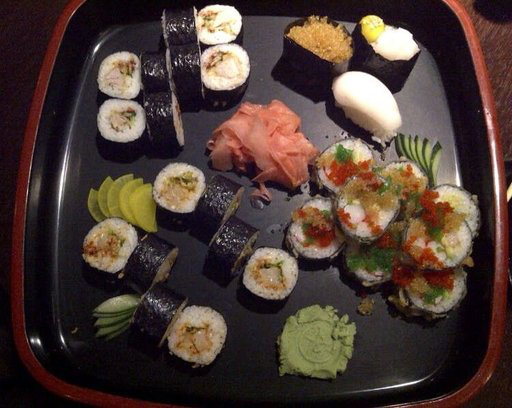

In [14]:
import random
from PIL import Image

random.seed(42)

image_path_list = list(image_path.glob("*/*/*.jpg"))

random_image_path = random.choice(image_path_list)

image_class = random_image_path.parent.stem

img = Image.open(random_image_path)

print(f"random_image_path : {random_image_path}")
print(f"Image class : {image_class}")
print(f"Image height: {img.height}")
print(f"Image width : {img.width}")
img

### Open image using matplotlib

(-0.5, 511.5, 407.5, -0.5)

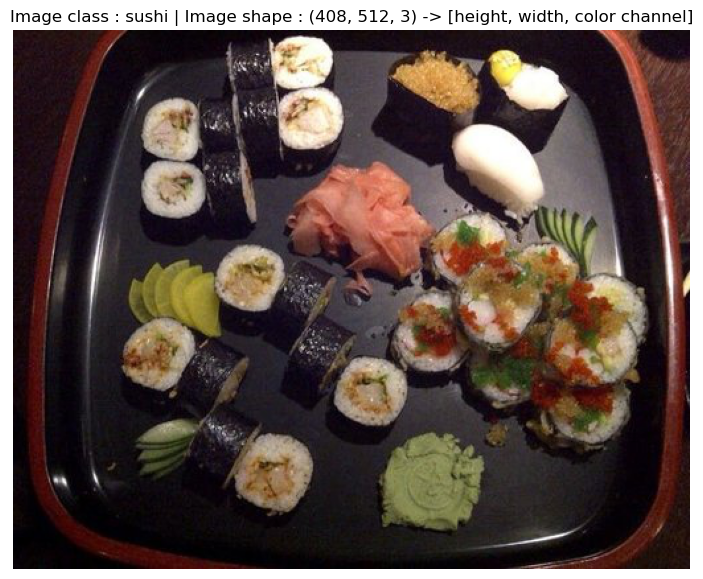

In [19]:
import numpy as np
import matplotlib.pyplot as plt

img_as_array = np.asarray(img)

plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class : {image_class} | Image shape : {img_as_array.shape} -> [height, width, color channel]")
plt.axis(False)

### Transforming our data

In [26]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

data_transform = transforms.Compose([
    # resize the image to 64 x 64
    transforms.Resize(size=(64, 64)),
    
    # flip the images
    transforms.RandomHorizontalFlip(p=0.5), # p = probability of flip 0.5 = 50% chance

    # turn the image to a torch.tensor
    transforms.ToTensor()
])

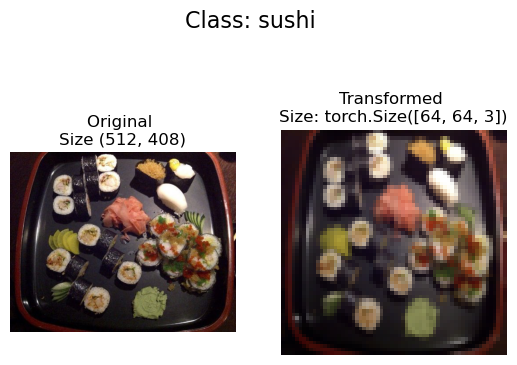

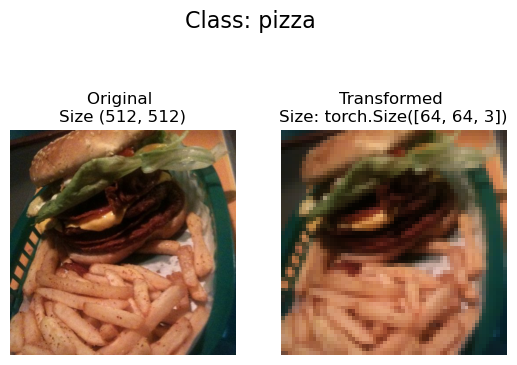

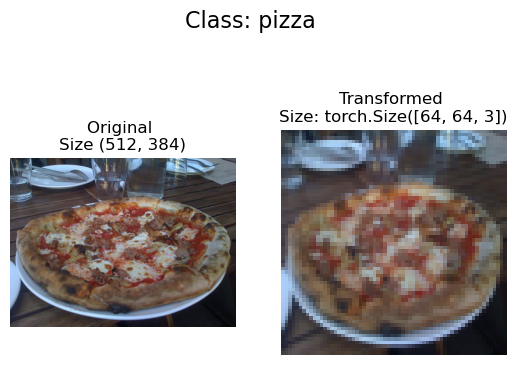

In [27]:
def plot_transformed_images(image_path, transform, n=3, seed=42):
    random.seed(42)
    random_image_paths = random.sample(image_path, k=n)

    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original \nSize {f.size}")
            ax[0].axis("off")

            """
                Permute will change shape of the image that is suitable for matplotlib,
                since pytorch uses [C, H, W] but matplotlib uses [H, W, C] instead
            """

            transformed_image = transform(f).permute(1, 2, 0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_path_list,
                        transform=data_transform,
                        n=3)

In [28]:
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform,
                                  target_transform=None)

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)

print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 225
    Root location: ..\data\pizza_steak_sushi\train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 75
    Root location: ..\data\pizza_steak_sushi\test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


In [29]:
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [30]:
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [31]:
len(train_data), len(test_data)

(225, 75)

In [32]:
train_data[0][0], train_data[0][1]

(tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
          [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
          [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
          ...,
          [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
          [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0863],
          [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],
 
         [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
          [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0706],
          [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
          ...,
          [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
          [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
          [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],
 
         [[0.0196, 0.0196, 0.0196,  ..., 0.0902, 0.0902, 0.0941],
          [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
          [0.0196, 0.0157, 0.0157,  ...,

In [33]:
img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor: \n{img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype : {img.dtype}")
print(f"Image label : {label}")
print(f"Label datatype : {type(label)}")

Image tensor: 
tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
         [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
         [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
         ...,
         [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
         [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0863],
         [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],

        [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
         [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0706],
         [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
         ...,
         [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
         [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
         [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],

        [[0.0196, 0.0196, 0.0196,  ..., 0.0902, 0.0902, 0.0941],
         [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
         [0.0196, 0.0157, 0.0157,  ..., 0.0

In [37]:
print(class_names)

['pizza', 'steak', 'sushi']


Original shape : torch.Size([3, 64, 64]) -> [color_channles, height, width]
Image permute shape : torch.Size([64, 64, 3]) -> [height, width, color_channels]


Text(0.5, 1.0, 'pizza')

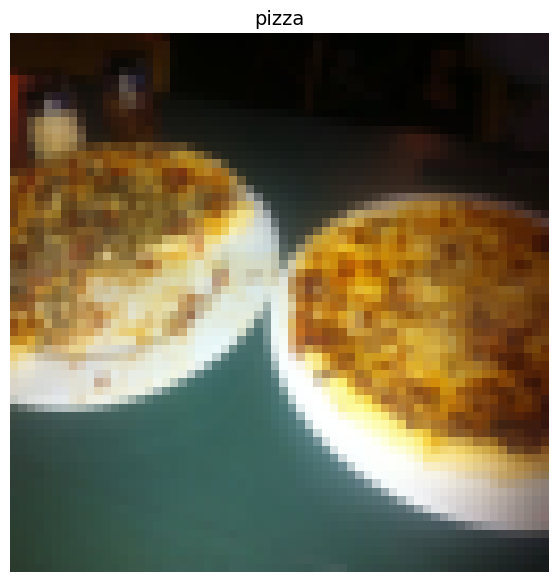

In [34]:
# Rearrange the order of dimensions
img_permuted = img.permute(1, 2, 0) # orginal indexes

print(f"Original shape : {img.shape} -> [color_channles, height, width]")
print(f"Image permute shape : {img_permuted.shape} -> [height, width, color_channels]")

plt.figure(figsize=(10, 7))
plt.imshow(img_permuted)
plt.axis(False)
plt.title(class_names[label], fontsize=14)

In [38]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=1,
                              num_workers=1, # number of cpus for loading the data in parallel (faster data loading)
                              shuffle=True) 

test_dataloader = DataLoader(dataset=test_data,
                              batch_size=1,
                              num_workers=1, # number of cpus for loading the data in parallel (faster data loading)
                              shuffle=False) # usually we dont shuffle the testing data

train_dataloader, test_dataloader 

(<torch.utils.data.dataloader.DataLoader at 0x29f788251d0>,
 <torch.utils.data.dataloader.DataLoader at 0x29f78f70910>)

In [55]:
img, label = next(iter(train_dataloader))

print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([1, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([1])


In [56]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

In [57]:
train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [ ]:
target_directory = train_dir
print(f"Target directory : {target_directory}")

class_names_found = sorted([entry.name for entry in list(os.scandir(image_path / "train"))])
print(f"Class names found: {class_names_found}")


WindowsPath('../data/pizza_steak_sushi/train')